In [1]:
library(bnlearn)                       
library(forecast)


Attaching package: ‘bnlearn’

The following object is masked from ‘package:stats’:

    sigma

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 5.8 



### Preprocesando el dataset 

In [3]:
library(readr)
sensores <- read_csv("~/phd-repos/tmin/tmin/datasets/junin-chaar/sensores.csv")
sensores

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_datetime(format = "")
)
See spec(...) for full column specifications.


X1,S10.max,S11.max,S12.max,S13.max,S14.max,S15.max,S16.max,S17.max,S18.max,⋯,S6.18hs,S7.18hs,S8.18hs,S9.18hs,Est.humedad_min,Est.humedad_med,Est.humedad_max,Est.temp_min,Est.temp_max,Est.temp_med
2013-09-07 23:00:41,31.0,30.0,32.0,31.5,32.0,31.0,32.0,31.0,31.0,⋯,27.75,27.75,27.75,27.75,26.62500,28.00000,29.37500,22.202500,24.157500,23.112500
2013-09-08 23:00:41,30.5,29.5,31.5,30.5,31.0,30.0,31.0,30.5,30.0,⋯,28.25,28.00,27.75,28.25,36.83333,39.25000,41.66667,18.350000,21.002917,19.575000
2013-09-09 23:00:41,34.0,32.5,34.0,34.0,34.0,33.5,34.0,34.0,33.5,⋯,27.50,27.25,27.50,27.25,35.50000,37.79167,40.04167,18.622083,21.067083,19.779167
2013-09-10 23:00:41,35.5,35.0,36.0,36.0,35.5,35.0,36.0,35.5,35.5,⋯,30.50,30.50,30.50,30.25,42.95833,45.50000,48.16667,18.089583,20.675417,19.320833
2013-09-11 23:00:41,24.5,24.0,24.5,24.5,24.0,24.5,24.5,24.0,24.0,⋯,22.00,21.50,21.75,22.00,37.37500,39.87500,42.41667,20.400417,23.149167,21.725000
2013-09-12 23:00:41,10.5,10.0,11.0,11.0,11.0,10.5,11.0,10.5,11.0,⋯,10.00,9.50,9.50,9.50,33.95833,36.04167,38.37500,16.220000,18.210833,17.162500
2013-09-13 23:00:41,14.5,13.5,14.5,14.0,14.0,14.0,14.0,14.0,13.5,⋯,10.25,9.75,9.75,9.75,54.12500,56.45833,59.00000,8.064583,9.400417,8.675000
2013-09-14 23:00:41,8.5,8.0,8.5,8.5,8.0,8.0,8.5,8.0,8.0,⋯,5.75,5.25,5.25,5.50,43.33333,45.87500,48.95833,7.663750,8.711250,8.095833
2013-09-15 23:00:41,7.0,7.0,7.0,7.0,6.5,7.0,7.0,7.0,7.0,⋯,5.25,4.75,4.75,5.00,63.66667,65.25000,66.66667,5.475000,6.360000,5.845833
2013-09-16 23:00:41,11.0,11.0,11.0,11.5,10.5,10.5,11.0,10.5,10.0,⋯,8.00,7.75,7.75,8.00,84.42105,86.68421,88.63158,2.542632,3.383158,2.889474


In [4]:

sensores_T <- sensores[2:nrow(sensores),] # no incluyo la primera fila

# renombro las columnas agregando T mayuscula al final
colnames(sensores_T) <- paste(colnames(sensores_T),"_T",sep="")

# creo dataset de datos tiempo "presentes" y datos del día siguiente o T
df <- cbind(sensores[1:(nrow(sensores)-1),-1],sensores_T[,-1])

df

S10.max,S11.max,S12.max,S13.max,S14.max,S15.max,S16.max,S17.max,S18.max,S19.max,⋯,S6.18hs_T,S7.18hs_T,S8.18hs_T,S9.18hs_T,Est.humedad_min_T,Est.humedad_med_T,Est.humedad_max_T,Est.temp_min_T,Est.temp_max_T,Est.temp_med_T
31.0,30.0,32.0,31.5,32.0,31.0,32.0,31.0,31.0,31.0,⋯,28.25,28.00,27.75,28.25,36.83333,39.25000,41.66667,18.350000,21.002917,19.575000
30.5,29.5,31.5,30.5,31.0,30.0,31.0,30.5,30.0,30.0,⋯,27.50,27.25,27.50,27.25,35.50000,37.79167,40.04167,18.622083,21.067083,19.779167
34.0,32.5,34.0,34.0,34.0,33.5,34.0,34.0,33.5,33.0,⋯,30.50,30.50,30.50,30.25,42.95833,45.50000,48.16667,18.089583,20.675417,19.320833
35.5,35.0,36.0,36.0,35.5,35.0,36.0,35.5,35.5,35.5,⋯,22.00,21.50,21.75,22.00,37.37500,39.87500,42.41667,20.400417,23.149167,21.725000
24.5,24.0,24.5,24.5,24.0,24.5,24.5,24.0,24.0,23.5,⋯,10.00,9.50,9.50,9.50,33.95833,36.04167,38.37500,16.220000,18.210833,17.162500
10.5,10.0,11.0,11.0,11.0,10.5,11.0,10.5,11.0,11.0,⋯,10.25,9.75,9.75,9.75,54.12500,56.45833,59.00000,8.064583,9.400417,8.675000
14.5,13.5,14.5,14.0,14.0,14.0,14.0,14.0,13.5,13.5,⋯,5.75,5.25,5.25,5.50,43.33333,45.87500,48.95833,7.663750,8.711250,8.095833
8.5,8.0,8.5,8.5,8.0,8.0,8.5,8.0,8.0,8.0,⋯,5.25,4.75,4.75,5.00,63.66667,65.25000,66.66667,5.475000,6.360000,5.845833
7.0,7.0,7.0,7.0,6.5,7.0,7.0,7.0,7.0,6.5,⋯,8.00,7.75,7.75,8.00,84.42105,86.68421,88.63158,2.542632,3.383158,2.889474
11.0,11.0,11.0,11.5,10.5,10.5,11.0,10.5,10.0,10.0,⋯,14.50,14.00,14.25,14.50,76.85714,78.34483,80.72414,3.783103,4.731724,4.200000


In [6]:
# muestro cantidad de filas y columnas 
ncol(df)
nrow(df)

[1] 252

[1] 464

In [7]:
training.set = df[1:350, ] # This is training set to learn the parameters
test.set = df[351:nrow(df), ]  # This is test set to give as evidence

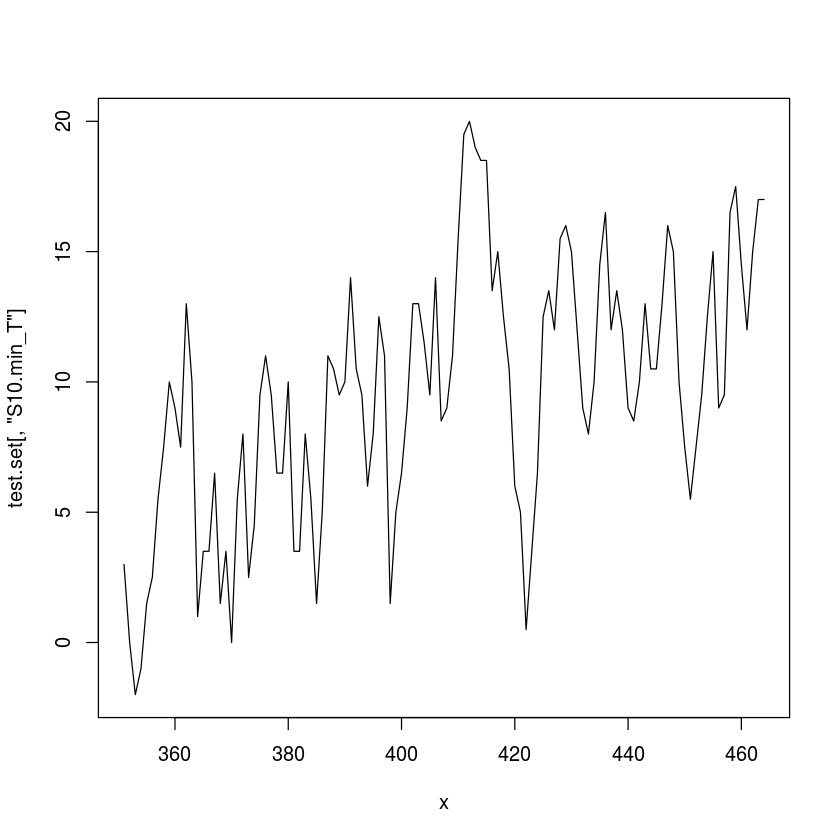

In [134]:
x = seq(from=351,to=(351+nrow(test.set)-1),by=1)
plot(x, test.set[,"S10.min_T"],type="l")

In [148]:
pred_sensores = c("S10.min_T","S11.min_T","S12.min_T","S13.min_T","S14.min_T","S15.min_T","S16.min_T","S18.min_T", "S19.min_T","S1.min_T","S20.min_T","S2.min_T","S3.min_T","S4.min_T","S5.min_T","S6.min_T","S7.min_T","S8.min_T","S9.min_T")

### Entrenando una Bayesian network con hill-climbing

In [8]:
start_time <- Sys.time()
res = hc(training.set)                 # learn BN structure on training set data 
end_time <- Sys.time()

In [9]:
end_time - start_time

Time difference of 8.944902 mins

In [11]:
res


  Bayesian network learned via Score-based methods

  model:
   [S14.max_T][S17.max_T|S14.max_T][S14.15hs_T|S14.max_T]
   [S18.max_T|S14.max_T:S17.max_T][S2.max_T|S14.max_T:S17.max_T:S18.max_T]
   [S10.max_T|S17.max_T:S2.max_T][S11.max_T|S10.max_T:S2.max_T]
   [S14.12hs_T|S10.max_T:S14.15hs_T][S4.max_T|S11.max_T:S17.max_T:S2.max_T]
   [S13.12hs_T|S14.12hs_T][S2.12hs_T|S14.12hs_T]
   [S17.15hs_T|S14.max_T:S17.max_T:S4.max_T:S14.15hs_T]
   [S7.12hs_T|S13.12hs_T:S14.12hs_T:S2.12hs_T]
   [S9.12hs_T|S14.12hs_T:S2.12hs_T:S7.12hs_T]
   [S20.12hs_T|S11.max_T:S14.max_T:S18.max_T:S14.15hs_T:S13.12hs_T:S14.12hs_T:S2.12hs_T:S7.12hs_T:S9.12hs_T]
   [S18.15hs_T|S14.max_T:S18.max_T:S14.15hs_T:S17.15hs_T:S14.12hs_T:S20.12hs_T]
   [S15.12hs_T|S13.12hs_T:S14.12hs_T:S20.12hs_T:S9.12hs_T]
   [S10.15hs_T|S10.max_T:S11.max_T:S17.max_T:S18.max_T:S14.15hs_T:S18.15hs_T]
   [S16.15hs_T|S10.max_T:S2.max_T:S14.15hs_T:S17.15hs_T:S18.15hs_T]
   [S12.15hs_T|S10.15hs_T:S18.15hs_T:S14.12hs_T:S15.12hs_T:S2.12hs_T:S7.1

In [10]:
start_time <- Sys.time()
fitted = bn.fit(res, training.set)     # learning of parameters
end_time <- Sys.time()
end_time - start_time

Time difference of 0.1894031 secs

In [154]:
fitted[pred_sensores]

$S10.min_T

  Parameters of node S10.min_T (Gaussian distribution)

Conditional density: S10.min_T | S7.min + S16.18hs + S8.media_T + S13.15hs_T + S16.12hs_T + S4.12hs_T + S14.18hs_T + S16.18hs_T
Coefficients:
(Intercept)       S7.min     S16.18hs   S8.media_T   S13.15hs_T   S16.12hs_T  
-1.20073631   0.07648808  -0.13234076   1.91231733  -0.40502134   0.25504070  
  S4.12hs_T   S14.18hs_T   S16.18hs_T  
-0.44944356   0.30669608  -0.55472814  
Standard deviation of the residuals: 1.261461 

$S11.min_T

  Parameters of node S11.min_T (Gaussian distribution)

Conditional density: S11.min_T | S10.min_T + S3.min_T + S6.min_T
Coefficients:
(Intercept)    S10.min_T     S3.min_T     S6.min_T  
 -0.2714774    0.5005641    0.3223101    0.1770378  
Standard deviation of the residuals: 0.2201095 

$S12.min_T

  Parameters of node S12.min_T (Gaussian distribution)

Conditional density: S12.min_T | S11.min_T + S5.min_T
Coefficients:
(Intercept)    S11.min_T     S5.min_T  
  0.2762904    0.3937704  

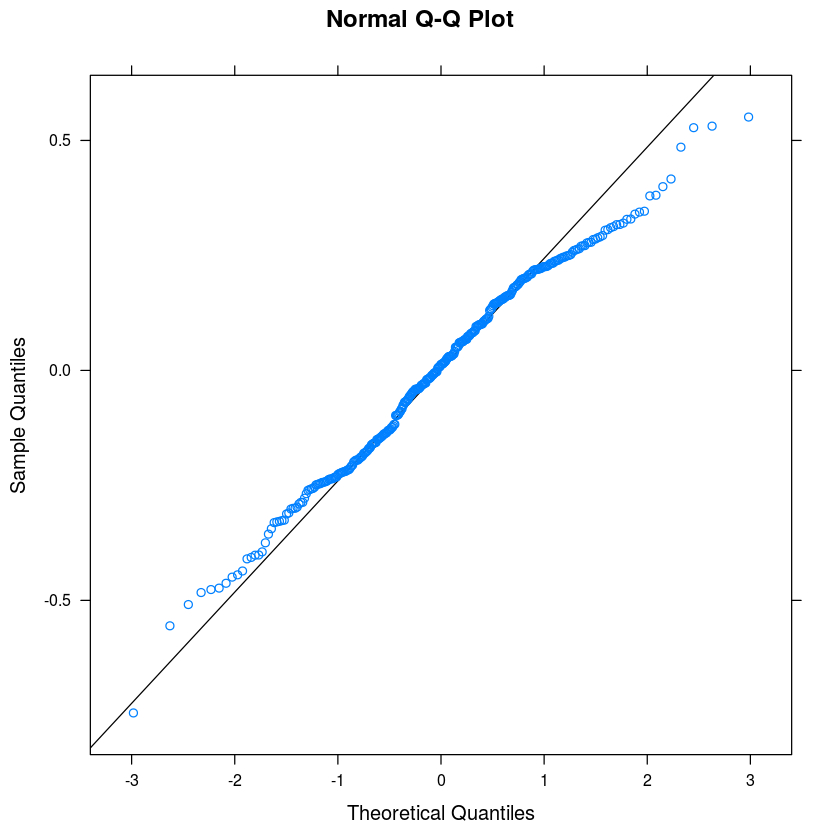

In [157]:
bn.fit.qqplot(fitted$S14.min_T)

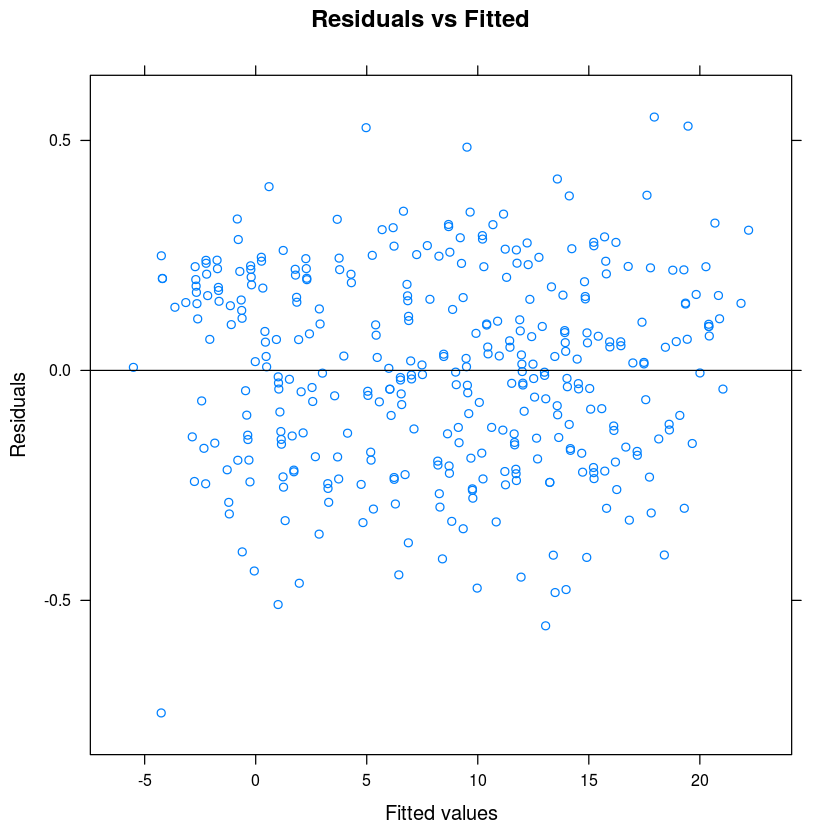

In [151]:
bn.fit.xyplot(fitted$S14.min_T) #pred_sensores

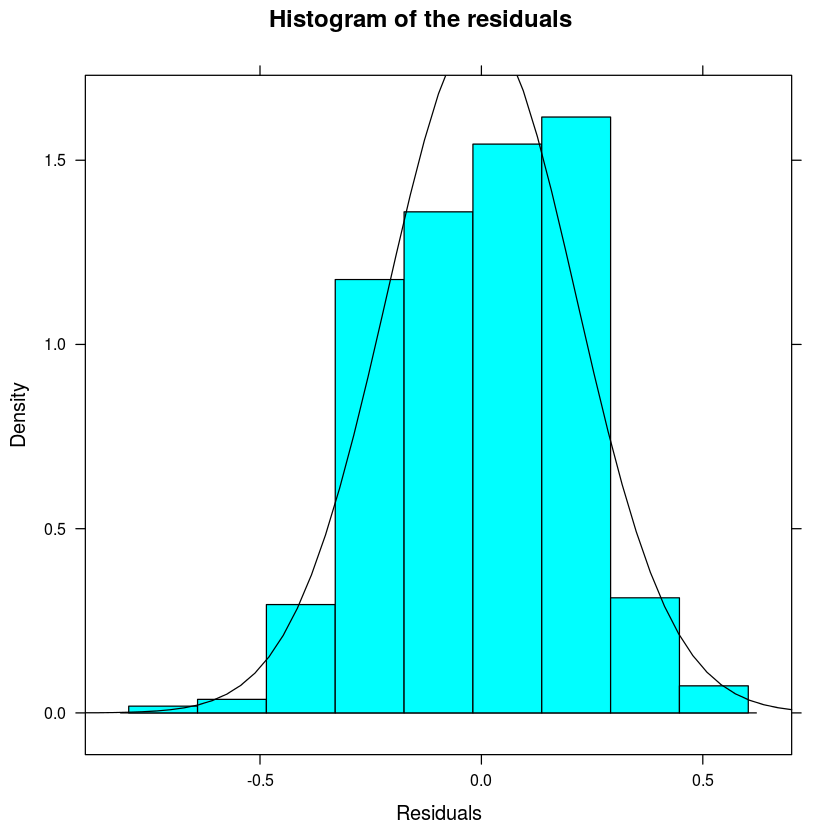

In [146]:
bn.fit.histogram(fitted$S14.min_T)

### Visualizando la matriz de adyacencia

In [41]:
#matriz de adyacencia
print(amat(res))

                  S10.max S11.max S12.max S13.max S14.max S15.max S16.max
S10.max                 0       1       1       0       0       1       0
S11.max                 0       0       0       1       0       1       0
S12.max                 0       0       0       1       0       1       0
S13.max                 0       0       0       0       0       0       0
S14.max                 0       0       1       1       0       1       1
S15.max                 0       0       0       0       0       0       0
S16.max                 0       0       0       0       0       0       0
S17.max                 1       0       0       0       0       0       0
S18.max                 0       1       1       1       0       0       1
S19.max                 0       0       0       0       0       0       0
S1.max                  0       0       0       0       0       0       0
S20.max                 0       0       0       0       0       0       0
S2.max                  1       1     

### Markov blanket 

In [55]:
for(i in 1:length(pred_sensores))
{
    cat("Markov blanket of ",pred_sensores[i],"\n")
    print(mb(res,pred_sensores[i]))
}

# pregunto por el markov blanket de S14.min
# mb(res,"S14.min_T")

Markov blanket of  S10.min_T 
 [1] "S11.max"     "S18.max"     "S6.max"      "S5.min"      "S7.min"     
 [6] "S8.min"      "S6.15hs"     "S7.15hs"     "S8.15hs"     "S10.18hs"   
[11] "S13.18hs"    "S16.18hs"    "S18.18hs"    "S19.18hs"    "S7.max_T"   
[16] "S8.max_T"    "S19.media_T" "S8.media_T"  "S11.min_T"   "S15.min_T"  
[21] "S3.min_T"    "S4.min_T"    "S5.min_T"    "S6.min_T"    "S7.min_T"   
[26] "S9.min_T"    "S13.15hs_T"  "S18.15hs_T"  "S9.15hs_T"   "S16.12hs_T" 
[31] "S17.12hs_T"  "S4.12hs_T"   "S5.12hs_T"   "S14.18hs_T"  "S16.18hs_T" 
Markov blanket of  S11.min_T 
 [1] "S11.max"      "S18.max"      "S2.max"       "S6.max"       "S7.max"      
 [6] "S13.media"    "S16.media"    "S1.media"     "S4.media"     "S13.15hs"    
[11] "S14.15hs"     "S19.15hs"     "S4.15hs"      "S6.15hs"      "S7.15hs"     
[16] "S8.15hs"      "S9.15hs"      "S10.18hs"     "S12.18hs"     "S13.18hs"    
[21] "S18.18hs"     "S19.18hs"     "S2.18hs"      "S7.18hs"      "S9.18hs"     
[26] "Est.temp_

In [34]:
mb(res,"S10.min_T")

[1] "S11.max"     "S18.max"     "S6.max"      "S5.min"      "S7.min"     
 [6] "S8.min"      "S6.15hs"     "S7.15hs"     "S8.15hs"     "S10.18hs"   
[11] "S13.18hs"    "S16.18hs"    "S18.18hs"    "S19.18hs"    "S7.max_T"   
[16] "S8.max_T"    "S19.media_T" "S8.media_T"  "S11.min_T"   "S15.min_T"  
[21] "S3.min_T"    "S4.min_T"    "S5.min_T"    "S6.min_T"    "S7.min_T"   
[26] "S9.min_T"    "S13.15hs_T"  "S18.15hs_T"  "S9.15hs_T"   "S16.12hs_T" 
[31] "S17.12hs_T"  "S4.12hs_T"   "S5.12hs_T"   "S14.18hs_T"  "S16.18hs_T"

### Probrando predecir valores

In [30]:
pred = predict(fitted, "S14.min_T", test.set)  # predicts the value of node S14.min given test set
cbind(pred, real=test.set[, "S14.min_T"])           # compare the actual and predicted


pred,real
4.2112155,4.5
0.0117187,0.0
-1.6966260,-1.5
-1.2402252,-1.0
1.7634330,2.0
2.0284593,2.5
5.8112919,6.0
7.2471292,7.5
10.2074069,10.0
9.2543185,9.5


In [31]:
accuracy(f = pred, x = test.set[, "S14.min_T"])


,ME,RMSE,MAE,MPE,MAPE
Test set,0.04892387,0.2392435,0.1934265,-Inf,Inf


In [35]:
pred = predict(fitted, "S10.min_T", test.set)  # predicts the value of node S14.min given test set
cbind(pred, real=test.set[, "S10.min_T"])           # compare the actual and predicted


pred,real
4.7380618,3.0
0.9776542,0.0
-1.1115951,-2.0
-1.8813272,-1.0
1.1344743,1.5
3.1228766,2.5
5.0505870,5.5
7.3200461,7.5
9.8761830,10.0
9.2826409,9.0


In [36]:
accuracy(f = pred, x = test.set[, "S10.min_T"])

,ME,RMSE,MAE,MPE,MAPE
Test set,-1.563592,2.268781,1.831773,-Inf,Inf


In [37]:
pred = predict(fitted, "S15.min_T", test.set)  # predicts the value of node S14.min given test set
cbind(pred, real=test.set[, "S15.min_T"])           # compare the actual and predicted


pred,real
3.24582954,4.0
-0.10584737,-0.5
-2.01682288,-2.0
-1.37967003,-1.5
1.38996379,1.5
2.02711664,2.0
5.37879355,5.5
7.01315384,7.0
9.78278766,10.0
8.86901959,9.0


In [67]:
aux = accuracy(f = pred, x = test.set[, "S15.min_T"])
aux

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.09708864,0.3228098,0.2652174,0.9804811,6.437157


In [68]:
aux[1]

[1] -0.09708864

In [39]:
mb(res,"S15.min_T")

[1] "S13.media"    "S16.media"    "S4.15hs"      "Est.temp_max" "S10.media_T" 
 [6] "S15.media_T"  "S10.min_T"    "S11.min_T"    "S12.min_T"    "S13.min_T"   
[11] "S14.min_T"    "S17.min_T"    "S18.min_T"    "S1.min_T"     "S20.min_T"   
[16] "S2.min_T"     "S3.min_T"     "S6.min_T"     "S7.min_T"     "S9.min_T"    
[21] "S9.18hs_T"

### MiRAR ESTOS RESULTADOS, para cada una de las predicciones de los sensores.

In [96]:
df <- data.frame(Variable=character(),ME=double(),RMSE=double(),MAE=double(),MPE=double(),MAPE=double(),stringsAsFactors=FALSE)
levels(df$Variable) <- pred_sensores
str(df)
col <- c("Variable","ME","RMSE","MAE","MPE","MAPE")

'data.frame':	0 obs. of  6 variables:
 $ Variable: atomic  
  ..- attr(*, "levels")= chr  "S10.min_T" "S11.min_T" "S12.min_T" "S13.min_T" ...
 $ ME      : num 
 $ RMSE    : num 
 $ MAE     : num 
 $ MPE     : num 
 $ MAPE    : num 


In [102]:

for(i in 1:length(pred_sensores))
{
    cat("Testing on ",pred_sensores[i],"\n")
    # predicts the value of node pred_sensores[i]  given test set
    pred = predict(fitted, pred_sensores[i], test.set)  
    # compare the actual and predicted, then print the values
    aux <- accuracy(f = pred, x = test.set[,pred_sensores[i]])
    print(cbind(pred, real=test.set[, pred_sensores[i]]))           
    r <- c(as.character(pred_sensores[i]),apply(aux,2,as.double))
    df <- rbind.data.frame(df,r,stringsAsFactors = FALSE) 
}

colnames(df) <- col

Testing on  S10.min_T 
             pred real
  [1,]  4.7380618  3.0
  [2,]  0.9776542  0.0
  [3,] -1.1115951 -2.0
  [4,] -1.8813272 -1.0
  [5,]  1.1344743  1.5
  [6,]  3.1228766  2.5
  [7,]  5.0505870  5.5
  [8,]  7.3200461  7.5
  [9,]  9.8761830 10.0
 [10,]  9.2826409  9.0
 [11,]  9.1306369  7.5
 [12,] 11.5286988 13.0
 [13,]  9.7838613 10.0
 [14,]  4.0788886  1.0
 [15,]  2.9149745  3.5
 [16,]  6.2971746  3.5
 [17,]  8.2002940  6.5
 [18,]  0.9810622  1.5
 [19,]  3.0834583  3.5
 [20,]  1.6596200  0.0
 [21,]  6.3743542  5.5
 [22,]  7.3477995  8.0
 [23,]  4.9665419  2.5
 [24,]  6.7686924  4.5
 [25,] 10.2769708  9.5
 [26,] 10.5446897 11.0
 [27,]  8.6260739  9.5
 [28,]  8.5077138  6.5
 [29,]  9.6526892  6.5
 [30,]  8.3953890 10.0
 [31,]  5.0179321  3.5
 [32,]  5.4404545  3.5
 [33,]  9.2737661  8.0
 [34,]  5.9297498  5.5
 [35,]  3.2056970  1.5
 [36,]  7.6648992  5.0
 [37,] 11.6924405 11.0
 [38,]  9.9452238 10.5
 [39,] 12.2092274  9.5
 [40,] 12.1183250 10.0
 [41,] 15.6465306 14.0
 [42,] 11.1

In [101]:
# TODO redondear a dos decimales
df

Variable,ME,RMSE,MAE,MPE,MAPE
S10.min_T,-1.56359247514151,2.26878106870395,1.83177259007104,-Inf,Inf
S11.min_T,0.0229657448011408,0.230268713454442,0.186373017026613,-Inf,Inf
S12.min_T,-0.17518701131571,0.299702172026622,0.234789083542279,-Inf,Inf
S13.min_T,-0.0868508579928376,0.246094228308014,0.189735808453712,-Inf,Inf
S14.min_T,0.0489238654865122,0.239243497015699,0.193426518394855,-Inf,Inf
S15.min_T,-0.141997088356436,0.351576612556089,0.282590990653849,0.224403772330215,5.99383970100476
S16.min_T,-0.00408975843378956,0.443094984783388,0.358171098583991,-0.174629112905029,6.22514095432269
S18.min_T,-0.0906724676316676,0.296578830762312,0.231445862368736,-Inf,Inf
S19.min_T,-0.0809033855861421,0.257865049247058,0.211146512813116,-Inf,Inf
S1.min_T,0.0171657035787975,0.278514126356804,0.214882487023733,2.15183765211723,5.76889994488208



* ME: Mean Error
* RMSE: Root Mean Squared Error
* MAE: Mean Absolute Error
* MPE: Mean Percentage Error
* MAPE: Mean Absolute Percentage Error


#### TODO plot de la red bayesiana. Dado que son muchas variables, se hace muy denso el plot, por lo que es conveniente 
#### encontrar herramientas para generar plots dinámicos, que permitan hacer zoom, mover los nodos, por ejemplo

In [ ]:
# TODO realizar queries sobre la red bayesiana, por ejemplo, dado ciertos valores de algunas variables, 
# cuan probable es que otras variables tomen ciertos valores

### Caso de uso de si.hiton.pc para visualizar Markov blanket

In [158]:
start_time <- Sys.time()
res2 = si.hiton.pc(training.set,alpha = 0.1) # <-- it takes a while running...
end_time <- Sys.time()
end_time - start_time


Time difference of 30.25968 secs

In [159]:
fitted = bn.fit(res2, training.set)     # learning of parameters


ERROR: Error in bn.fit(res2, training.set): the graph is only partially directed.


In [166]:
# undirected.arcs(res2)


In [165]:
dag = cextend(res2)

ERROR: Error in cextend(res2): no consistent extension of res2 is possible.


In [163]:
dag = set.arc(res2, "S10.min", "S10.min_T")
fit = bn.fit(dag, training.set)

ERROR: Error in bn.fit(dag, training.set): the graph is only partially directed.


In [138]:
res2


  Bayesian network learned via Constraint-based methods

  model:
    [undirected graph]
  nodes:                                 252 
  arcs:                                  420 
    undirected arcs:                     420 
    directed arcs:                       0 
  average markov blanket size:           3.33 
  average neighbourhood size:            3.33 
  average branching factor:              0.00 

  learning algorithm:                    Semi-Interleaved HITON-PC 
  conditional independence test:         Pearson's Correlation 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  62737 
  optimized:                             TRUE 


In [139]:
for(i in 1:length(pred_sensores))
{
    cat("Markov blanket of ",pred_sensores[i],"\n")
    print(mb(res2,pred_sensores[i]))
}

Markov blanket of  S10.min_T 
[1] "S11.min_T" "S15.min_T" "S7.min_T"  "S9.min_T" 
Markov blanket of  S11.min_T 
[1] "S10.min_T" "S14.min_T" "S15.min_T"
Markov blanket of  S12.min_T 
[1] "S13.min_T" "S16.min_T" "S19.min_T" "S1.min_T"  "S5.min_T"  "S8.min_T" 
Markov blanket of  S13.min_T 
[1] "S12.min_T" "S14.min_T" "S2.min_T" 
Markov blanket of  S14.min_T 
[1] "S11.min_T" "S13.min_T" "S15.min_T" "S17.min_T" "S6.min_T" 
Markov blanket of  S15.min_T 
[1] "S10.min_T" "S11.min_T" "S14.min_T" "S18.min_T"
Markov blanket of  S16.min_T 
[1] "S12.min_T" "S19.min_T" "S8.min_T"  "S9.min_T" 
Markov blanket of  S18.min_T 
[1] "S15.min_T" "S17.min_T" "S19.min_T"
Markov blanket of  S19.min_T 
[1] "S12.min_T" "S16.min_T" "S18.min_T" "S20.min_T"
Markov blanket of  S1.min_T 
[1] "S12.min_T" "S20.min_T" "S2.min_T"  "S8.min_T" 
Markov blanket of  S20.min_T 
[1] "S19.min_T" "S1.min_T"  "S4.min_T"  "S5.min_T"  "S7.min_T" 
Markov blanket of  S2.min_T 
[1] "S13.min_T" "S1.min_T"  "S3.min_T"  "S4.min_T"  "S5.mi

### intento con iamb

In [ ]:
# tarda horas en correr... to be done later...

start_time <- Sys.time()
pdag = iamb(training.set)
end_time <- Sys.time()
end_time - start_time


In [ ]:
# undirected.arcs(pdag)


In [169]:
# dag = cextend(pdag)
# fit = bn.fit(dag, training.set)
# fit

## material de lectura o bibliografia o referencia

 Filminas sobre el uso de librería bnlearn: http://www.bnlearn.com/about/slides/slides-useRconf13.pdf
 